** Using Shor's algorithm, a number N can be factored  in polynomial time. In this example, we will factor 15 using a quantum algorithm. Qiskit will be used to implement the code.

importing necessary libraries from Qiskit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from math import gcd
import pandas as pd
from qiskit.visualization import plot_histogram

## Initializing the Qubits

We will start by initializing a set of $n$ qubits with $2^n$ number of computational basis states in superposition. To create a superposition, a hadamard gate is then applied on n qubits so that they go from the |0> to |0>$^(n\bigotimes)$.

In [2]:
def initialize_qubits(given_circuit, n, m): 

    given_circuit.h(range(n))
    given_circuit.x(n+m-1)

## Modular Exponentiation

We will use the fact that any prime number can be rewritten as $N=pq$ where $p$ and $q$ are primes to reframe the problem so that we can solve the equation $f(x)=a^x\mod{n}$ for it's period.

In [3]:
from qiskit import QuantumCircuit

def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

In [4]:
def modular_exponentiation(circuit, n, m, a):
    

    for x in range(n):
        exponent = 2**x
        circuit.append(c_amod15(a, exponent), 
                     [x] + list(range(n, n+m)))

In [5]:
from qiskit.circuit.library import QFT

In [6]:
def inverse_qft(circuit, measurement_qubits):
    

    circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(), measurement_qubits)

In [7]:
def shors_algorithm(n, m, a):
    
   
    qc = QuantumCircuit(n+m, n)
    
  
    initialize_qubits(qc, n, m)
    qc.barrier()

   
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

 
    inverse_qft(qc, range(n))

    
    qc.measure(range(n), range(n))
    
    return qc
    
n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)

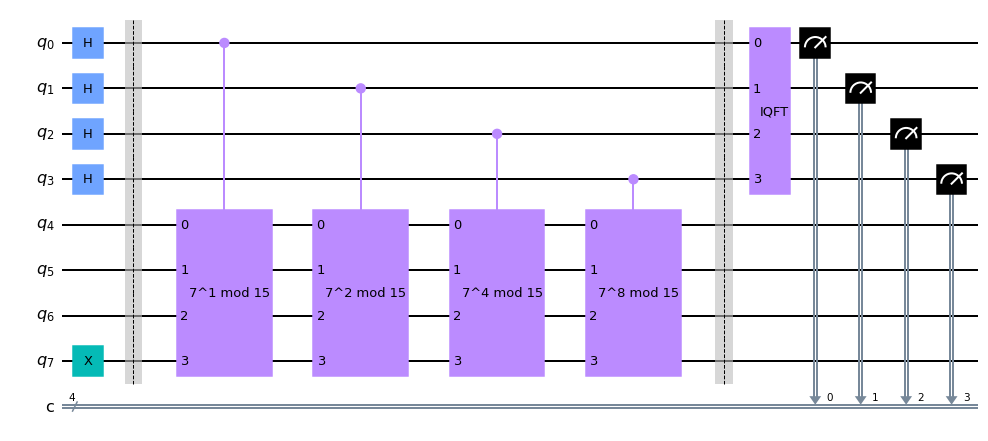

In [8]:
final_circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator, shots=1000).result().get_counts(final_circuit)

In [12]:
for measured_value in counts:
    print(" {int(measured_value[::-1], 2)}")

 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}


##Classical Computer Simulation

In [ ]:
# Find the factors of a number

# Computes the factor of the argument passed
def print_factors(x):
   print("The factors of",x,"are:")
   for i in range(1, x + 1): #loop through numbers from 1 to x
       if x % i == 0: # if x is divisible by i (which is in the range of 1-x)
           print(i)

num = 15

print_factors(num)

In [17]:
for i in counts:
    measured_value = int(i[::-1], 2)
  
    
    if measured_value % 2 != 0:
        print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** ((double)(measured_value)/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) #we saw earlier that a^(r/2)+1 or a^(r/2)-1 should be a factor of 15
    print(factors)

Measured value not even
Measured value not even


NameError: name 'double' is not defined